Import

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("../data/processed/cleaned_data.csv")


Do Longer Titles Lead to More Shares?

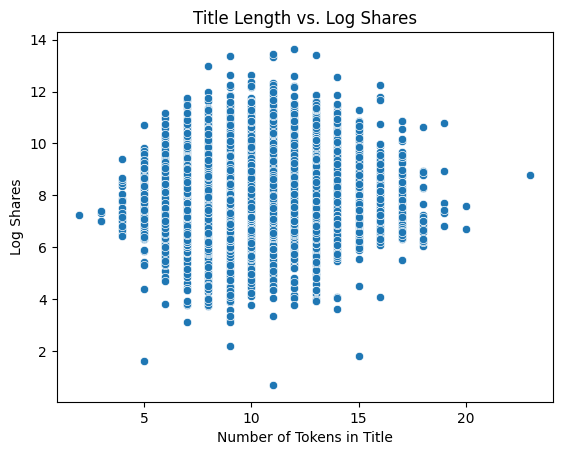

In [25]:
sns.scatterplot(data=df, x="n_tokens_title", y="log_shares")
plt.title("Title Length vs. Log Shares")
plt.xlabel("Number of Tokens in Title")
plt.ylabel("Log Shares")
plt.show()

C:\Users\ocana\AppData\Local\Temp\ipykernel_4812\1150128794.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("title_length_bin")["log_shares"].mean().plot(kind="bar")


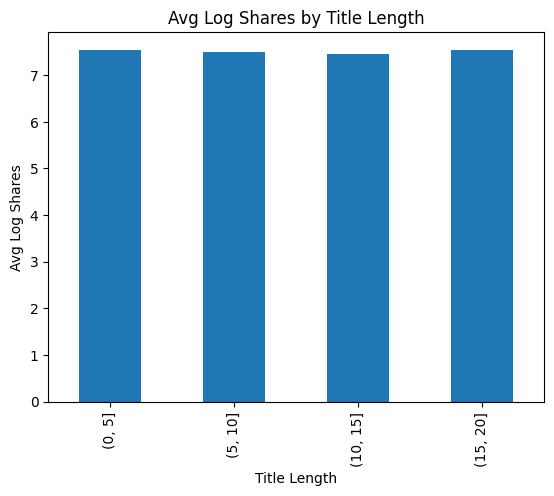

In [26]:
# Bin title length
df["title_length_bin"] = pd.cut(df["n_tokens_title"], bins=[0, 5, 10, 15, 20])

# Bar chart: average log_shares per bin
df.groupby("title_length_bin")["log_shares"].mean().plot(kind="bar")
plt.title("Avg Log Shares by Title Length")
plt.xlabel("Title Length")
plt.ylabel("Avg Log Shares")
plt.show()

C:\Users\ocana\AppData\Local\Temp\ipykernel_4812\76562511.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_bin_means = df.groupby("title_length_bin")["log_shares"].mean()


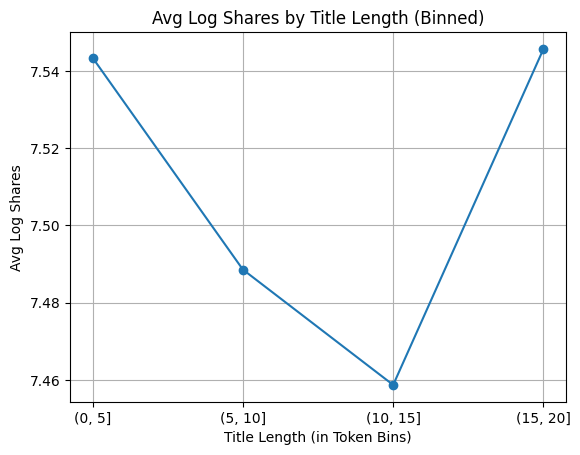

Correlation: -0.019048394273936838


In [27]:
# Step 2: Group and calculate mean log_shares
title_bin_means = df.groupby("title_length_bin")["log_shares"].mean()

# Step 3: Plot as a line chart
plt.plot(title_bin_means.index.astype(str), title_bin_means.values, marker='o')
plt.title("Avg Log Shares by Title Length (Binned)")
plt.xlabel("Title Length (in Token Bins)")
plt.ylabel("Avg Log Shares")
plt.grid(True)
plt.show()


# Optional: Correlation
print("Correlation:", df["n_tokens_title"].corr(df["log_shares"]))


Does More Content Lead to More Shares?

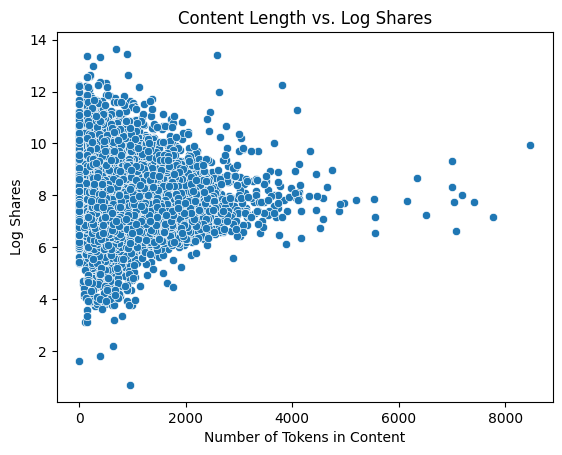

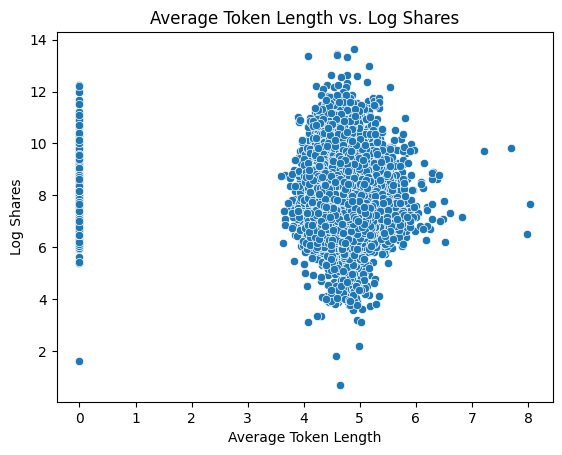

In [28]:
# Content length
sns.scatterplot(data=df, x="n_tokens_content", y="log_shares")
plt.title("Content Length vs. Log Shares")
plt.xlabel("Number of Tokens in Content")
plt.ylabel("Log Shares")
plt.show()

# Token length
sns.scatterplot(data=df, x="average_token_length", y="log_shares")
plt.title("Average Token Length vs. Log Shares")
plt.xlabel("Average Token Length")
plt.ylabel("Log Shares")
plt.show()


C:\Users\ocana\AppData\Local\Temp\ipykernel_4812\3674451634.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_means = df.groupby("title_length_bin")["log_shares"].mean()


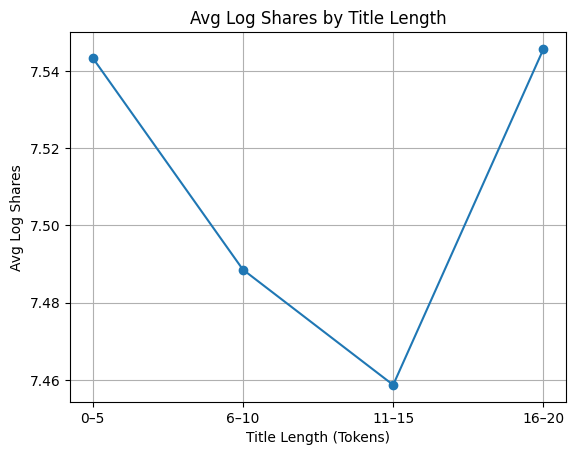

Content Length Corr: 0.024846484645168664
Avg Token Length Corr: -0.0453213270218581


In [29]:
# Use same bins
df["title_length_bin"] = pd.cut(
    df["n_tokens_title"],
    bins=[0, 5, 10, 15, 20],
    labels=["0–5", "6–10", "11–15", "16–20"]
)

# Group and plot as a line chart
title_means = df.groupby("title_length_bin")["log_shares"].mean()

plt.plot(title_means.index.astype(str), title_means.values, marker='o')
plt.title("Avg Log Shares by Title Length")
plt.xlabel("Title Length (Tokens)")
plt.ylabel("Avg Log Shares")
plt.grid(True)
plt.show()


# Correlation values
print("Content Length Corr:", df["n_tokens_content"].corr(df["log_shares"]))
print("Avg Token Length Corr:", df["average_token_length"].corr(df["log_shares"]))

Does More Visuals Lead to More Shares?

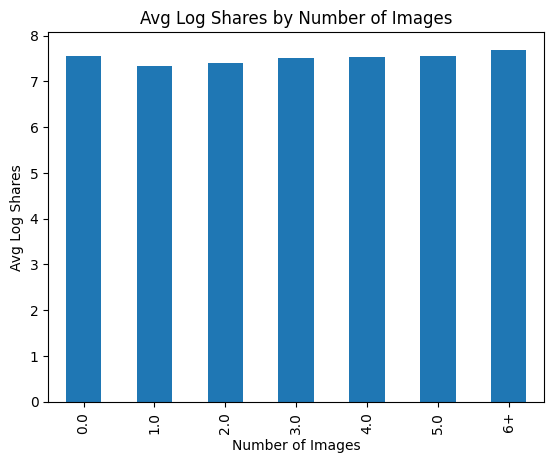

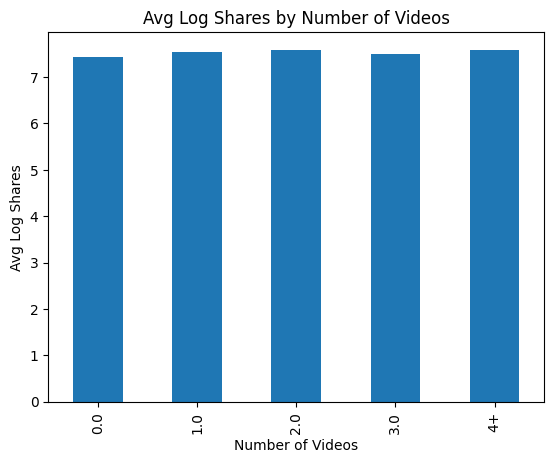

In [30]:
# Limit to top 6 image counts to avoid noise
df["num_imgs_limited"] = df["num_imgs"].apply(lambda x: x if x < 6 else "6+")

df.groupby("num_imgs_limited")["log_shares"].mean().plot(kind="bar")
plt.title("Avg Log Shares by Number of Images")
plt.xlabel("Number of Images")
plt.ylabel("Avg Log Shares")
plt.show()

# Same for videos
df["num_videos_limited"] = df["num_videos"].apply(lambda x: x if x < 4 else "4+")

df.groupby("num_videos_limited")["log_shares"].mean().plot(kind="bar")
plt.title("Avg Log Shares by Number of Videos")
plt.xlabel("Number of Videos")
plt.ylabel("Avg Log Shares")
plt.show()

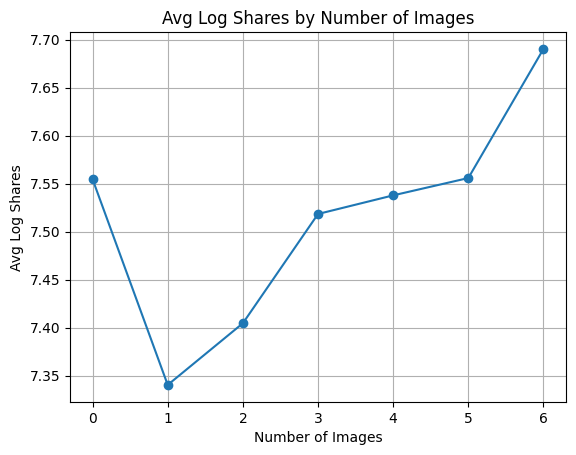

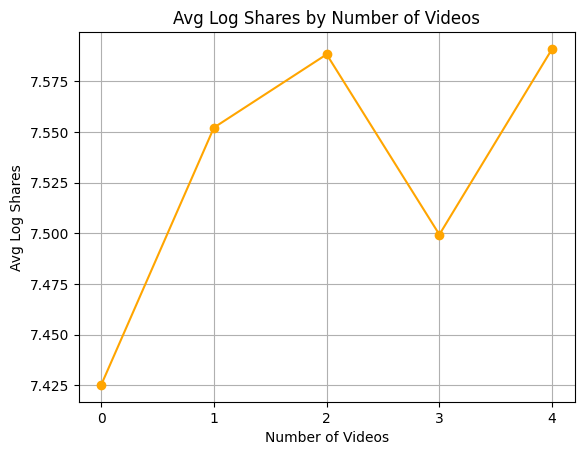

Images Corr: 0.09151937212088178
Videos Corr: 0.03215139950733441


In [31]:
# For images (limit to top 6)
df["num_imgs_limited"] = df["num_imgs"].apply(lambda x: x if x < 6 else 6)
img_means = df.groupby("num_imgs_limited")["log_shares"].mean()

plt.plot(img_means.index, img_means.values, marker='o')
plt.title("Avg Log Shares by Number of Images")
plt.xlabel("Number of Images")
plt.ylabel("Avg Log Shares")
plt.xticks(img_means.index)  # Show each image count on x-axis
plt.grid(True)
plt.show()

# For videos (limit to top 4)
df["num_videos_limited"] = df["num_videos"].apply(lambda x: x if x < 4 else 4)
vid_means = df.groupby("num_videos_limited")["log_shares"].mean()

plt.plot(vid_means.index, vid_means.values, marker='o', color='orange')
plt.title("Avg Log Shares by Number of Videos")
plt.xlabel("Number of Videos")
plt.ylabel("Avg Log Shares")
plt.xticks(vid_means.index)  # Show each video count on x-axis
plt.grid(True)
plt.show()

# Optional correlation
print("Images Corr:", df["num_imgs"].corr(df["log_shares"]))
print("Videos Corr:", df["num_videos"].corr(df["log_shares"]))